# Exploration of Life and Death of Avengers
The Avengers are a well-known and widely-loved team of superheroes in the Marvel universe that were originally introduced in the 1960's comic book series. Because the writers killed off and revived many of the superheroes, we will try to explore this information further. The dataset used in this project can be find [here](https://github.com/fivethirtyeight/data/tree/master/avengers). 

While the [FiveThirtyEight](https://fivethirtyeight.com/) team did a wonderful job acquiring the data, it still has some inconsistencies. Our mission is to clean up their data set so it can be more useful for analysis in pandas. 

In [1]:
import pandas as pd
avengers = pd.read_csv("avengers.txt", delimiter=",", encoding = "windows-1252")
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


## Filtering Out Bad Data

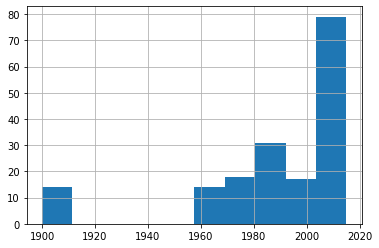

In [2]:
import matplotlib.pyplot as plt
avengers['Year'].hist()

If you look at the histogram above, which describes the year Marvel introduced each Avenger, you'll immediately notice some oddities. For example, there are quite a few Avengers who look like they were introduced in 1900, which is impossible, as the Avengers weren't introduced in the comic series until the 1960's.

This is obviously a mistake in the data. So, we only want to keep the Avengers who were introduced after 1960.

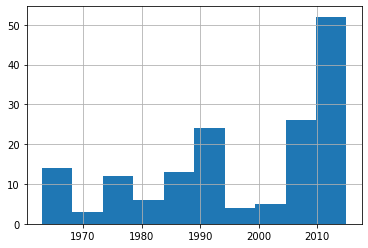

In [3]:
true_avengers = avengers[avengers['Year'] > 1959]
true_avengers['Year'].hist()

## Consolidating Deaths
We're interested in the total number of deaths each character experienced, so we'd like to have a single field containing that information. Right now, there are five fields (Death1 to Death5), each of which contains a binary value representing whether a superhero experienced that death or not.

We'd like to combine that information in a single field so we can perform numerical analysis on it more easily.

In [4]:
true_avengers['Deaths'] = 0
death_cols = ['Death{}'.format(i) for i in range(1,6)]

for c in death_cols:
    true_avengers.loc[true_avengers[c] == 'YES', 'Deaths'] += 1     

true_avengers['Deaths'].value_counts()      

0    91
1    52
2    14
5     1
3     1
Name: Deaths, dtype: int64

## Verifying Years Since Joining
For our final task, we want to verify that the Years since joining field accurately reflects the Year column. For example, if an Avenger was introduced in the Year 1960, is the Years since joining value for that Avenger 55 (as the dataset was created in 2015)?

In [5]:
joined_accuracy_count  = int()
correct_joined_years = true_avengers[true_avengers['Years since joining'] == (2015 - true_avengers['Year'])]
joined_accuracy_count = len(correct_joined_years)

print(joined_accuracy_count, 'rows out of', true_avengers.shape[0], 'have correct values in Years since joining.')

159 rows out of 159 have correct values in Years since joining.
